UNSUPERVISED LEARNING TASK

Objective: Cluster tech workers into mental health personas

Importing Libraries:

In [522]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import umap.umap_ as umap

import warnings
warnings.filterwarnings('ignore')

Loading the dataframe built in EDA:

In [523]:
df= joblib.load("../Models & Dataset/df.pkl")
print(df.shape)
print(df.columns)
df.head()

(931, 23)
Index(['Age', 'Gender', 'Country', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'company_size'],
      dtype='object')


,Age,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,company_size
0,37,Female,United States,No,Yes,Often,Small,No,Yes,Not sure,...,Easy,No,No,Yes,Yes,No,Maybe,Yes,No,1
2,32,Male,Canada,No,No,Rarely,Small,No,No,No,...,Difficult,No,No,Yes,Yes,Yes,Yes,No,No,1
3,31,Male,United Kingdom,Yes,Yes,Often,Medium,No,No,Yes,...,Difficult,Yes,Yes,Yes,No,Maybe,Maybe,No,Yes,2
4,31,Male,United States,No,No,Never,Medium,Yes,Yes,No,...,Don't know,No,No,Yes,Yes,Yes,Yes,Don't know,No,2
5,33,Male,United States,Yes,No,Sometimes,Small,No,Yes,Not sure,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,1


In [524]:
bins=[10, 20, 30, 40, 50, 60, 70, 80]
labels=['<20', '20-30', '30-40','40-50','50-60','60-70', '70+']
df['age_group']=pd.cut(df['Age'], bins=bins, labels=labels)

Choosing relevant features:

In [525]:

features= ['age_group','family_history', 'treatment', 'work_interfere','benefits', 
    'seek_help', 'anonymity', 'leave','mental_vs_physical',
    'coworkers', 'supervisor','mental_health_consequence']
df_features= df[features]
df_features= pd.get_dummies(df_features, drop_first=True)

df_features.shape

(931, 26)

In [526]:
scaler= StandardScaler()
X_scaled= scaler.fit_transform(df_features)


Dimensionality Reduction:

In [527]:
#PCA
pca= PCA(n_components=2, random_state=42)
X_pca= pca.fit_transform(X_scaled)

#TSNE
tsne= TSNE(n_components=2, random_state=42, perplexity= 30)
X_tsne= tsne.fit_transform(X_scaled)

#UMAP
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=20, min_dist=0.1,)
X_umap = reducer.fit_transform(X_scaled)


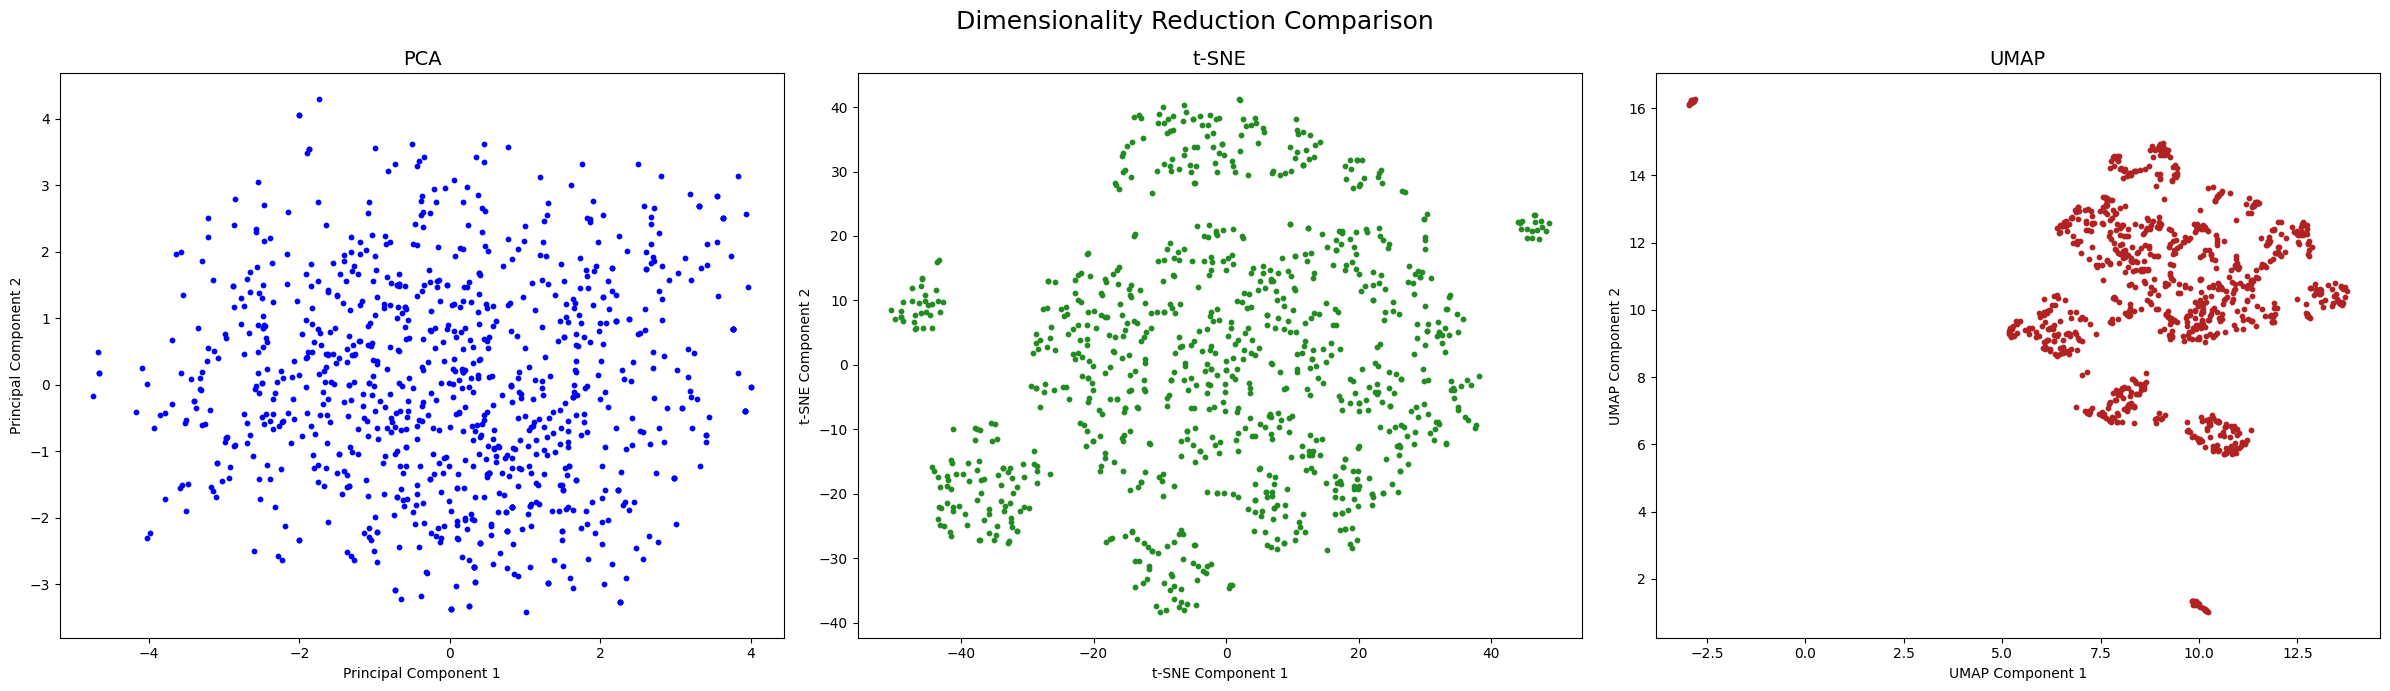

In [528]:
fig, ax = plt.subplots(1, 3, figsize=(24, 7))

# PLotting PCA 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], s=10, c='blue')
ax[0].set_title('PCA', fontsize=14)
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

# Plotting t-SNE 
ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], s=10, c='forestgreen')
ax[1].set_title('t-SNE', fontsize=14)
ax[1].set_xlabel('t-SNE Component 1')
ax[1].set_ylabel('t-SNE Component 2')

# PLotting UMAP 
ax[2].scatter(X_umap[:, 0], X_umap[:, 1], s=10, c='firebrick')
ax[2].set_title('UMAP', fontsize=14)
ax[2].set_xlabel('UMAP Component 1')
ax[2].set_ylabel('UMAP Component 2')

plt.suptitle('Dimensionality Reduction Comparison', fontsize=18)
plt.tight_layout()
plt.show()

Optimal No. of Clusters:

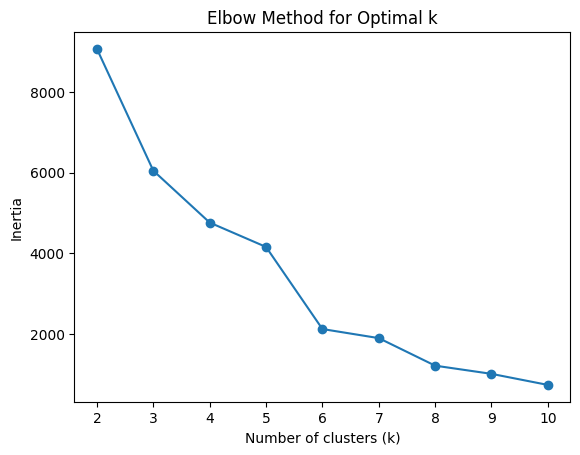

In [529]:
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_umap)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

Silhouette Scores:

In [530]:
best_k= 6
sil_scores=[]
k_range= range(2,11)
print("Silhoutte Scores for UMAP: \n")
for k in k_range:
    kmeans= KMeans(n_clusters=k, random_state=42)
    labels= kmeans.fit_predict(X_umap)
    score= silhouette_score(X_umap, labels)
    sil_scores.append(score)
    print(f"k = {k}: {score}")


Silhoutte Scores for UMAP: 

k = 2: 0.4141570031642914
k = 3: 0.395723819732666
k = 4: 0.4294480085372925
k = 5: 0.3906227648258209
k = 6: 0.44167760014533997
k = 7: 0.42215192317962646
k = 8: 0.478974312543869
k = 9: 0.4942065477371216
k = 10: 0.5263573527336121


Clustering Algorithms:

In [531]:
X=X_umap

# KMeans
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=best_k)
labels_agg = agg.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

In [532]:
print("Silhouette KMeans:", silhouette_score(X, labels_kmeans))
print("Silhouette Agglomerative:", silhouette_score(X, labels_agg))
# For DBSCAN, checking if all points are not noise (-1)
if len(set(labels_dbscan)) > 1:
    print("Silhouette DBSCAN:", silhouette_score(X, labels_dbscan))

Silhouette KMeans: 0.4416776
Silhouette Agglomerative: 0.457052
Silhouette DBSCAN: 0.12100663


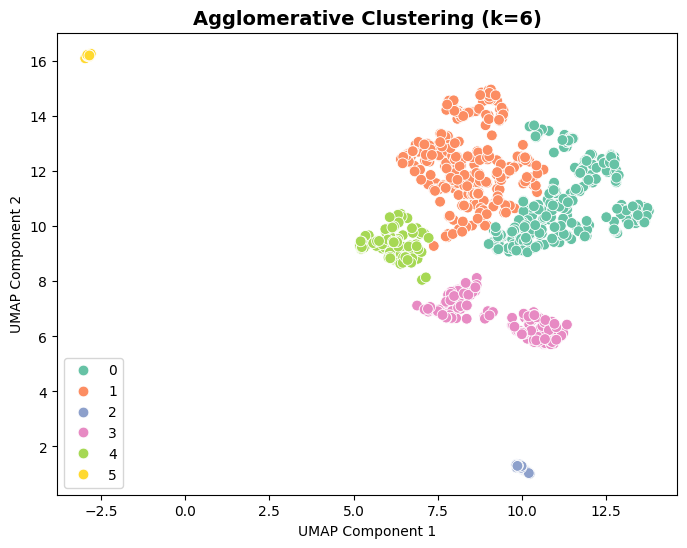

Use Agglomerative with 6 clusters for persona analysis


In [533]:
# Agglomerative Visualization
final_labels= labels_agg
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue= final_labels, palette='Set2', s=60)
plt.title(f"Agglomerative Clustering (k={best_k})", fontsize=14, fontweight='bold')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

print(f"Use Agglomerative with {best_k} clusters for persona analysis")


In [ ]:
df_encoded= df_features.copy()
df_encoded["Cluster"]= final_labels
df_with_clusters= df.copy()
df_with_clusters["Cluster"]= final_labels

cluster_profiles= df_encoded.groupby("Cluster").mean(numeric_only=True).round(2)
cluster_modes= df_with_clusters.groupby("Cluster").agg(lambda x: x.value_counts().index[0])

with pd.option_context('display.max_columns', None):
    display(cluster_profiles)
    display(cluster_modes)

,age_group_20-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70,age_group_70+,family_history_Yes,treatment_Yes,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,work_interfere_Unknown,benefits_No,benefits_Yes,seek_help_No,seek_help_Yes,anonymity_No,anonymity_Yes,leave_Don't know,leave_Easy,mental_vs_physical_No,mental_vs_physical_Yes,coworkers_Yes,supervisor_Yes,mental_health_consequence_No,mental_health_consequence_Yes
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.92,0.05,0.00,0.0,0.0,0.0,0.32,0.38,0.00,0.00,0.45,0.33,0.25,0.31,0.50,0.13,0.00,0.28,0.46,0.41,0.22,0.34,0.84,0.70,0.47,0.17
1,0.06,0.92,0.00,0.0,0.0,0.0,0.39,0.44,0.00,0.02,0.55,0.21,0.29,0.38,0.50,0.21,0.00,0.31,0.48,0.37,0.21,0.30,0.79,0.71,0.40,0.21
2,0.37,0.47,0.13,0.0,0.0,0.0,0.53,0.57,0.27,0.03,0.50,0.10,0.73,0.07,1.00,0.00,1.00,0.00,0.10,0.20,0.63,0.20,0.60,0.47,0.03,0.70
3,0.29,0.21,0.50,0.0,0.0,0.0,0.46,0.73,0.56,0.06,0.20,0.09,0.28,0.49,0.48,0.26,0.01,0.32,0.45,0.34,0.27,0.28,0.80,0.74,0.35,0.24
4,0.54,0.42,0.03,0.0,0.0,0.0,0.45,0.78,0.00,1.00,0.00,0.00,0.28,0.53,0.52,0.18,0.00,0.34,0.46,0.41,0.21,0.21,0.85,0.70,0.48,0.19
5,0.00,0.00,0.00,1.0,0.0,0.0,0.35,0.71,0.06,0.41,0.18,0.06,0.12,0.65,0.24,0.53,0.00,0.35,0.53,0.35,0.12,0.29,0.71,0.65,0.47,0.18


,Age,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,company_size,age_group
Cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,26,Male,United States,No,No,Sometimes,Medium,No,Don't know,No,No,No,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,2,20-30
1,32,Male,United States,No,No,Sometimes,Small,No,Yes,No,No,No,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,1,30-40
2,33,Male,United States,Yes,Yes,Sometimes,Small,No,No,No,No,No,No,Difficult,Yes,No,Yes,No,No,Maybe,No,No,1,30-40
3,43,Male,United States,No,Yes,Often,Small,No,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Yes,Yes,No,Maybe,Don't know,No,1,40-50
4,32,Male,United States,No,Yes,Rarely,Small,No,Yes,Yes,No,No,Don't know,Don't know,No,No,Yes,Yes,No,No,Don't know,No,1,20-30
5,56,Male,United States,No,Yes,Rarely,Large,No,Yes,Yes,No,Yes,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,3,50-60


**CLUSTER 0: Young Aware Connectors**

Mostly younger employees (20–30), with moderate family history of mental health issues but low current treatment uptake. They rarely report work interference. They’re socially open with coworkers and supervisors, creating a positive work environment. However, many are uncertain about workplace mental health policies like leave and anonymity. Their needs may remain unaddressed until issues escalate, making early identification crucial.

**CLUSTER 1: Mid-Career Cautious Allies**

Primarily in their 30s, showing moderate mental health needs and some history. They maintain open communication with peers and supervisors, but engagement with formal resources is limited. They may underutilize available resources, indicating an opportunity for proactive outreach. This segment needs proactive HR nudges to convert awareness into consistent support-seeking.

**CLUSTER 2:  High-Risk Isolates**

Spanning 30–50, these employees face significant mental health challenges — high family history, frequent work interference, and clear mental health consequences. They have the highest treatment engagement but operate in environments with no anonymity protections and poor policy clarity. They need urgent interventions tailored for confidentiality, flexible leaves and mental health liaisons.

**CLUSTER 3: Burnout Veterans**

Older mid-career professionals (40–50) with high treatment prevalence, frequent work interference, and noticeable impacts on productivity. They benefit from supportive colleagues and supervisors but still face uncertainty around formal leave policies and anonymity. Their openness is tempered by fatigue from long-term stress exposure. Structured burnout prevention programs and sustained managerial training could stabilize this group.

**CLUSTER 4: Proactive Balanced Seekers**

Comprising mainly 20–40-year-olds, this group engages in treatment and reports minimal work interference. They maintain high trust with peers and supervisors, positioning them as champions for mental health advocacy within teams. However, they lack full clarity on policies. This segment could be leveraged in wellness initiatives to normalize help-seeking behaviour.

**CLUSTER 5: Steady Seniors**

Predominantly 50–60, they report moderate treatment use and low perceived mental health consequences. Their work relationships are generally supportive, but policy understanding remains limited. Many may rely on personal coping strategies rather than formal programs. Gentle, non-intrusive wellness check-ins and policy clarity can prevent hidden struggles.